# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [58]:
# General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Scikit-learn libraries for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Scikit-learn libraries for clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Other libraries
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.metrics import silhouette_score


In [59]:
#Preprocessing
data = pd.read_excel('alldata.xlsx')
data.rename(columns={'parti': 'party'}, inplace=True)
data.rename(columns={'alder': 'age'}, inplace=True)
data.rename(columns={'navn': 'name'}, inplace=True)
data.rename(columns={'storkreds': 'area'}, inplace=True)
data.head()

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,area,age
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58


In [60]:
# Check for missing values in the datasets
print(data.isnull().sum())
# CHeck for types
print(data.dtypes)

530      0
531      0
533      0
534      0
535      0
537      0
538      0
540      0
541      0
543      0
544      0
545      0
546      0
547      0
548      0
550      0
551      0
552      0
553      0
555      0
556      0
557      0
559      0
561      0
563      0
name     0
party    0
1a       0
1b       0
2a       0
2b       0
3a       0
3b       0
4a       0
4b       0
5a       0
5b       0
6a       0
6b       0
7a       0
7b       0
8a       0
8b       0
9a       0
9b       0
10a      0
10b      0
11a      0
11b      0
12a      0
12b      0
area     0
age      0
dtype: int64
530       int64
531       int64
533       int64
534       int64
535       int64
537       int64
538       int64
540       int64
541       int64
543       int64
544       int64
545       int64
546       int64
547       int64
548       int64
550       int64
551       int64
552       int64
553       int64
555       int64
556       int64
557       int64
559       int64
561       int64
563       int64
name

In [61]:
QUESTION_COLUMNS = [
                    "530",
                    "531",
                    "533",
                    "534",
                    "535",
                    "537",
                    "538",
                    "540",
                    "541",
                    "543",
                    "544",
                    "545",
                    "546",
                    "547",
                    "548",
                    "550",
                    "551",
                    "552",
                    "553",
                    "555",
                    "556",
                    "557",
                    "559",
                    "561",
                     "1a",
                     "1b",
                     "2a",
                     "2b",
                     "3a",
                     "3b",
                     "4a",
                     "4b",
                     "5a",
                     "5b",
                     "6a",
                     "6b",
                     "7a",
                     "7b",
                     "8a",
                     "8b",
                     "9a",
                     "9b",
                     "10a",
                     "10b",
                     "11a",
                     "11b",
                     "12a",
                     "12b",]

# Select only the columns corresponding to the questions
questions_df = data[QUESTION_COLUMNS]

In [62]:
#Further preprocessing

# Imputing missing values and scaling numerical columns
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Imputing missing values and encoding categorical columns
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

# Combining the transformers using a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, QUESTION_COLUMNS),
        ('cat', cat_transformer, ['party', 'area'])])

# Fitting and transforming the data
preprocessed_data = preprocessor.fit_transform(data)

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
preprocessed_data = pca.fit_transform(preprocessed_data)

scaled_questions = num_transformer.fit_transform(questions_df)

In [63]:
#TSNE reduces dimentionality of the dataset
#Using tSNE to visualize the dataset
# Applying t-SNE
tsne = TSNE(n_components=2, random_state=0)
transformed_features = tsne.fit_transform(scaled_questions)

# The result is a 2D array of the t-SNE features
print(transformed_features)


[[-11.252414    -6.110092  ]
 [ 32.026756     1.346129  ]
 [ 26.080875     0.71830976]
 ...
 [ 14.542109    18.350763  ]
 [ 12.447292    13.383592  ]
 [ 18.435564    10.659068  ]]


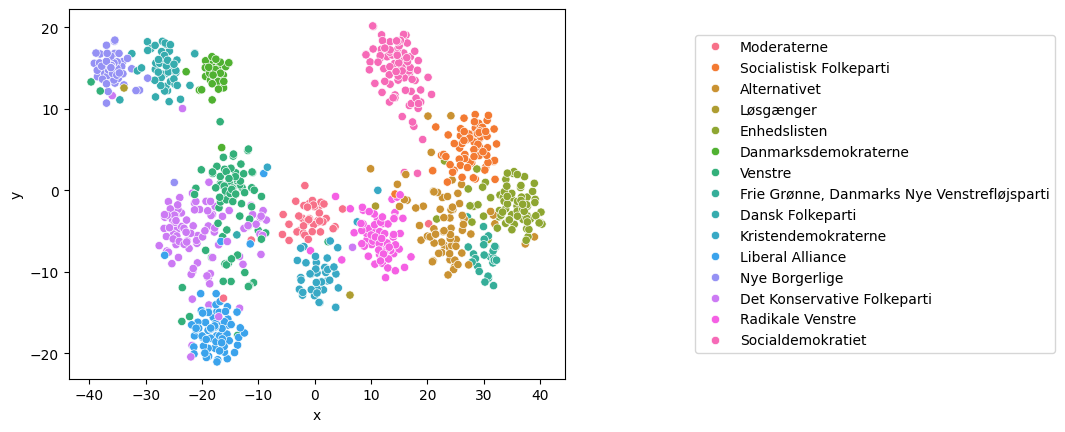

In [64]:
# Copying the original data to a new variable tSNE_data
tSNE_data = data

# Adding a new column 'x' to tSNE_data, assigning the first column of transformed_features to it
tSNE_data['x'] = transformed_features[:,0]

# Adding a new column 'y' to tSNE_data, assigning the second column of transformed_features to it
tSNE_data['y'] = transformed_features[:,1]

# Creating a scatter plot using seaborn (sns) with 'x' and 'y' as coordinates
# The points are colored based on the 'party' column
g = sns.scatterplot(x='x', y='y', hue='party', data=data)

# Putting the legend to be outside the plot
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

# Displaying the plot
plt.show()

In [65]:
#An analysis/description of which questions are most crucial concerning their placement on the axes.

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_questions)

# The explained variance tells us how much information (variance) can be attributed to each principal component
print(pca.explained_variance_ratio_)

#We can see that there are 2 principal components which contain around 52 procent of information in the questions dataset.

[0.4159558  0.10436241]


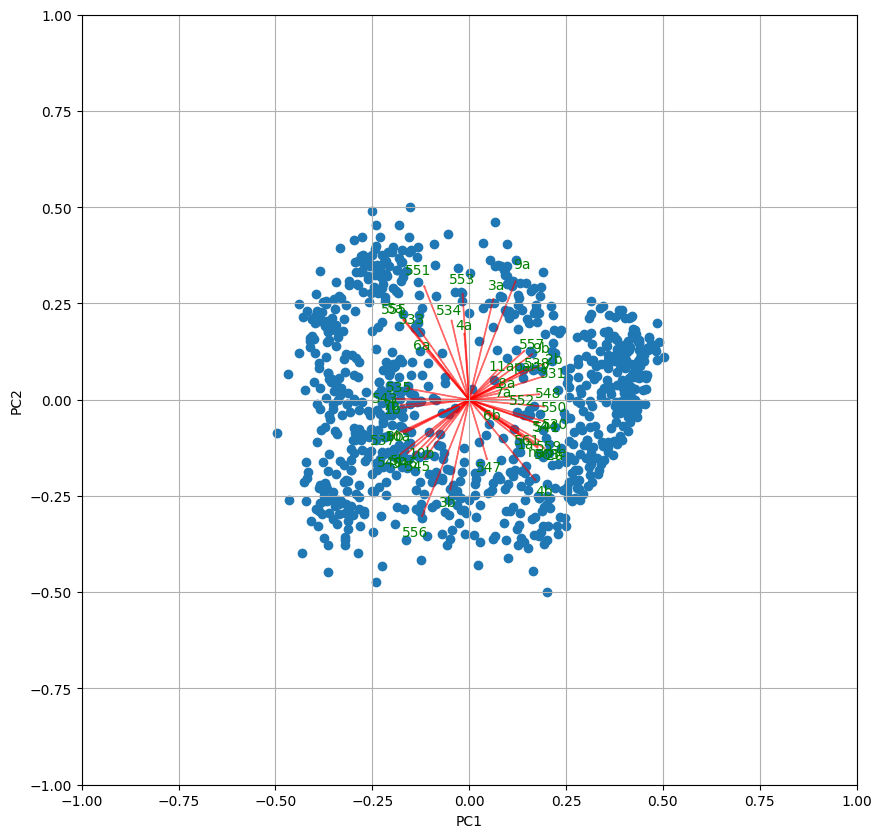

In [66]:
# In this code, the biplot function creates a scatterplot of the scores from the first two principal components, 
# then adds an arrow for each original variable. 
# The direction and length of the arrows indicate how each variable contributes to the two principal components.

def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')

plt.figure(figsize=(10, 10))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

# Calling the biplot function. Using only the 2 PCs.
biplot(principalComponents[:,0:2], np.transpose(pca.components_[0:2, :]), labels=data.columns)
plt.show()

###Direction: The direction of an arrow shows the correlation between the original variable and the principal components. 
###If an arrow is close to the horizontal axis, it means that the original variable is highly correlated with the first principal component. 
###If it’s close to the vertical axis, it’s highly correlated with the second principal component.


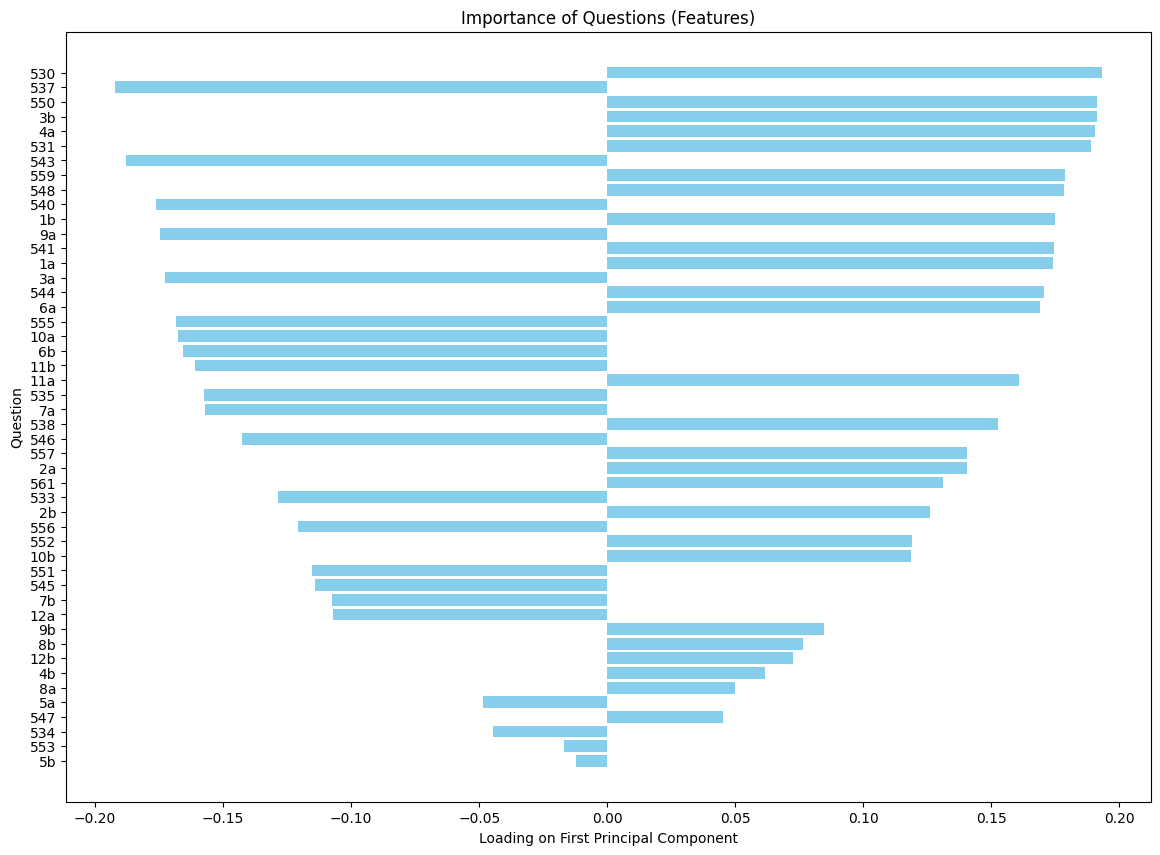

In [67]:
#Bar plot showing features contributing to creation of the first principal component

questions = questions_df.columns
#Puts the values of importance of the first principal component into loadings_pc1
loadings_pc1 = pca.components_[0]

#Creates a dataframe with loadings and corresponding questions
df_loadings = pd.DataFrame({'Question': questions, 'Loading': loadings_pc1})
#Calculating the absolute value of each loading and store them in a new column 'Abs_Loading'
df_loadings['Abs_Loading'] = df_loadings['Loading'].abs()
#Sorting the dataframe
df_loadings = df_loadings.sort_values('Abs_Loading', ascending=False)

# Plotting
plt.figure(figsize=(14, 10))
plt.barh(df_loadings['Question'], df_loadings['Loading'], color='skyblue')
plt.xlabel('Loading on First Principal Component')
plt.ylabel('Question')
plt.title('Importance of Questions (Features)')
plt.gca().invert_yaxis() 
plt.show()

# The length of the bar represents how much each variable contributes to the first principal component (called loading). 
# This gives a visual representation of the importance of each question. 
# The questions are sorted by the absolute value of the loadings, so the question at the top of the plot is the most important one for the first principal component.
# The questions 530, 537 and 550 seem to be the most important

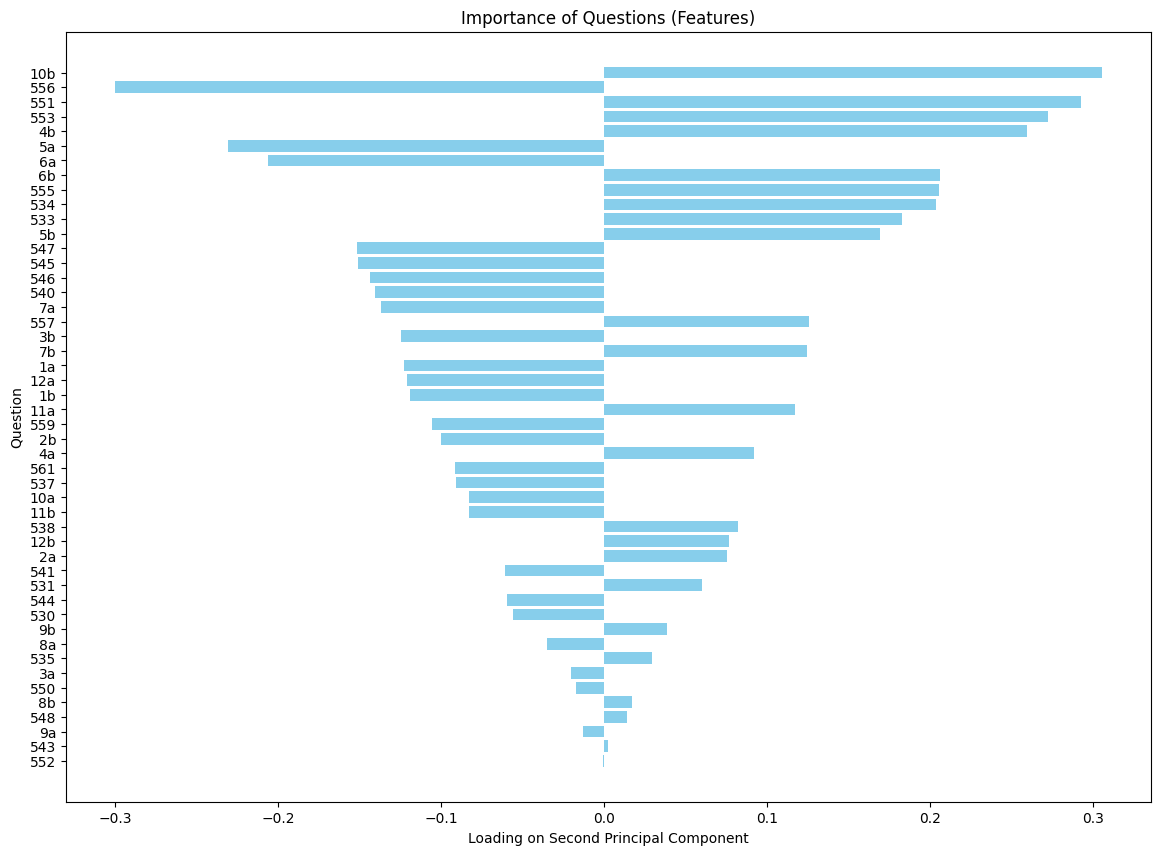

In [68]:
#Doing the same for second principal component

questions = questions_df.columns
loadings_pc1 = pca.components_[1]
df_loadings = pd.DataFrame({'Question': questions, 'Loading': loadings_pc1})

df_loadings['Abs_Loading'] = df_loadings['Loading'].abs()
df_loadings = df_loadings.sort_values('Abs_Loading', ascending=False)

plt.figure(figsize=(14, 10))
plt.barh(df_loadings['Question'], df_loadings['Loading'], color='skyblue')
plt.xlabel('Loading on Second Principal Component')
plt.ylabel('Question')
plt.title('Importance of Questions (Features)')
plt.gca().invert_yaxis()  
# The questions 10b, 556 and 551 seem to be the most important

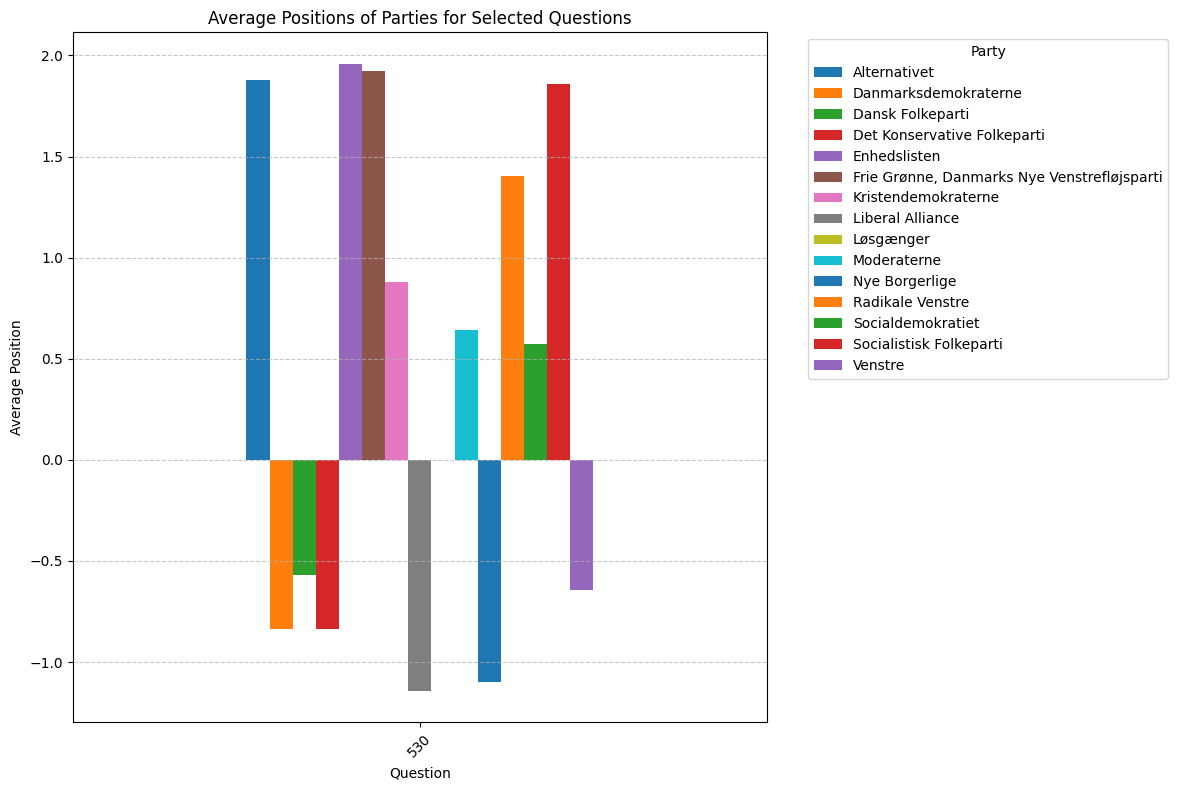

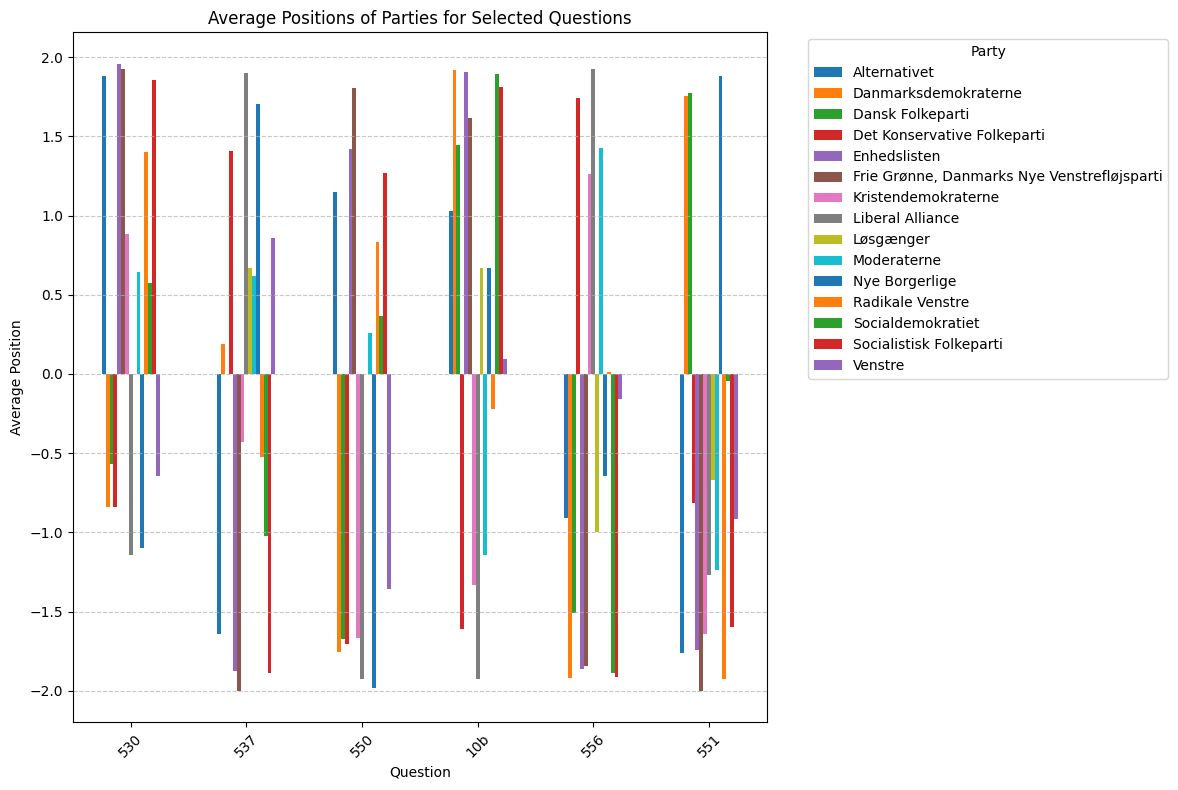

In [69]:
partyData = data[[
                "party",
                "530",
                "531",
                "533",
                "534",
                "535",
                "537",
                "538",
                "540",
                "541",
                "543",
                "544",
                "545",
                "546",
                "547",
                "548",
                "550",
                "551",
                "552",
                "553",
                "555",
                "556",
                "557",
                "559",
                "561",
                "1a",
                "1b",
                "2a",
                "2b",
                "3a",
                "3b",
                "4a",
                "4b",
                "5a",
                "5b",
                "6a",
                "6b",
                "7a",
                "7b",
                "8a",
                "8b",
                "9a",
                "9b",
                "10a",
                "10b",
                "11a",
                "11b",
                "12a",
                "12b",]]


# Calculating average positions by party
average_positions = partyData.groupby('party').mean()

# Plotting average positions for selected questions and parties
def plot_selected_questions(average_positions, selected_questions):

    # Transposing the DataFrame
    avg_positions_transposed = average_positions[selected_questions].T

    plt.figure(figsize=(12, 8))
    avg_positions_transposed.plot(kind='bar', stacked=False, ax=plt.gca())

    plt.title('Average Positions of Parties for Selected Questions')
    plt.xlabel('Question')
    plt.ylabel('Average Position')
    plt.xticks(rotation=45)
    plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

# Plotting average positions for question 530
plot_selected_questions(average_positions, ['530'])
plt.show()

# Plotting average positions for selected questions
selected_questions = ['530', '537', '550', '10b', '556', '551']  
plot_selected_questions(average_positions, selected_questions)
plt.show()

A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. 
Discuss whether there is room for more clusters/parties or if a reduction is needed. 
Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**

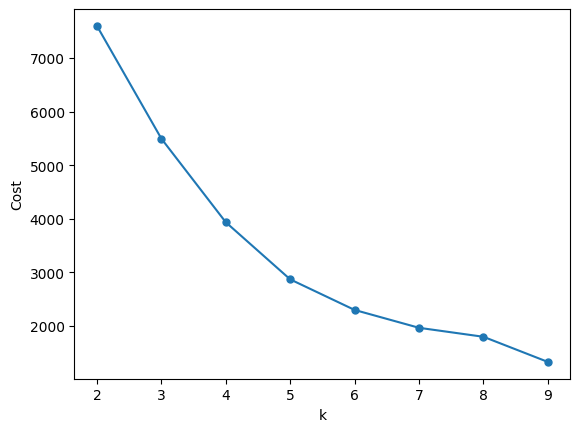

In [70]:
#k-Means
costs = []
ks = range(2,10)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    #Fitting the model
    kmeans.fit(preprocessed_data)
    costs.append(kmeans.inertia_)
plt.plot(ks,costs,'.-', markersize=10)
plt.xlabel('k')
plt.ylabel('Cost')
plt.show()
### Shows 5 as the best choice, found by "elbow method"
### Based on this method, we can deduce that we could reduce the number of parties in Denmark to 5, because the rest are too similar

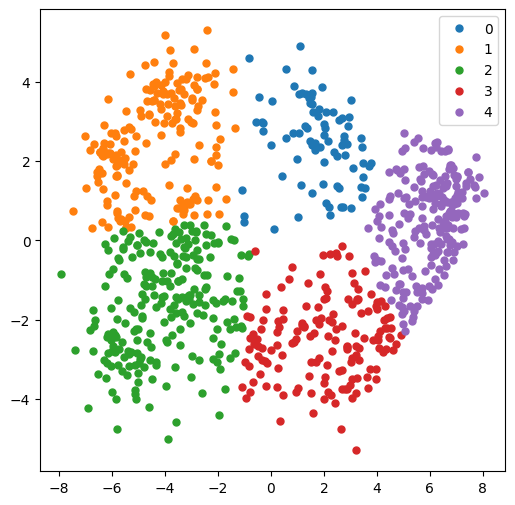

In [71]:
# Finding optimal value of clusters

k = 5
fig, ax = plt.subplots(figsize = (6,6))
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(preprocessed_data)

# Plotting the data points assigned to each cluster
for i in range(k):
    ax.plot(preprocessed_data[labels == i, 0], preprocessed_data[labels == i, 1], '.', markersize=10, label = str(i))
ax.legend()
plt.show()

kmeans_labels = labels

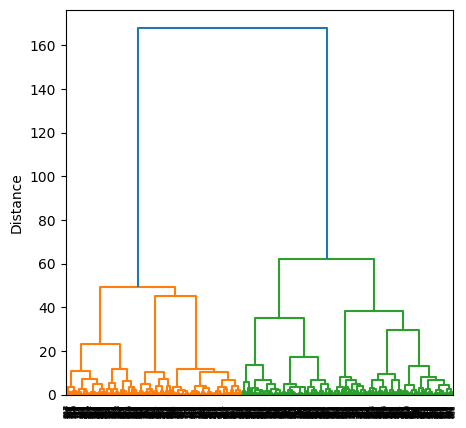

In [72]:
#Hierarchical clustering, Agglomerative clustering

### Computing the distances between data points using Ward’s method, plotting a dendrogram of these distances.

# Computing distances using Ward's method
linkage_array = ward(preprocessed_data)
    
# Creating a new figure
fig, ax = plt.subplots(figsize = (5,5))
    
# Plotting the dendrogram
dendrogram(linkage_array, ax = ax)
    
# Setting the y-axis label
ax.set_ylabel('Distance')
    
# Showing the plot
plt.show()

### Based on this method, we can deduce that we could reduce the number of parties in Denmark to 5, because the rest are too similar

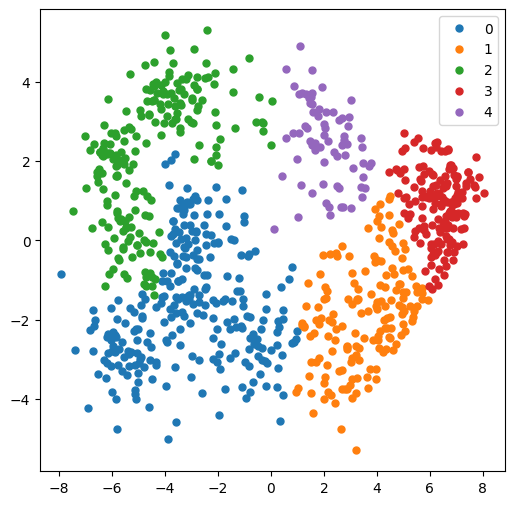

In [73]:
k=5 #We take the longest vertical segment without any merging and count how many vertical lines there are in that segment
fig, ax = plt.subplots(figsize = (6,6))
agg = AgglomerativeClustering(n_clusters=k, linkage = "ward")
labels = agg.fit_predict(preprocessed_data)
for i in range(k):
    ax.plot(preprocessed_data[labels == i , 0] , preprocessed_data[labels == i , 1], '.', markersize=10, label = str(i))
ax.legend()
plt.show()

agg_labels = labels

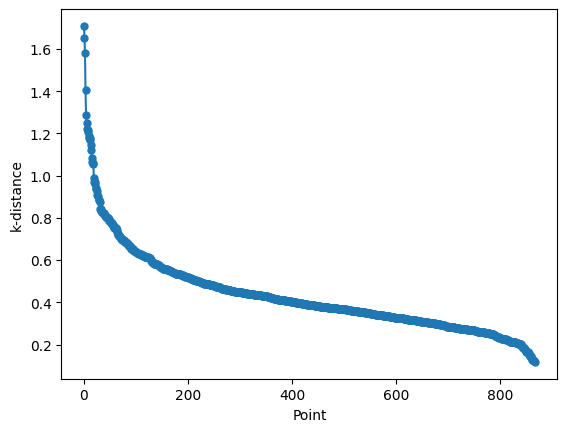

In [74]:
#DBSCAN
k_distance = []
for i in range(len(preprocessed_data)):
    dist = []
    for j in range(len(preprocessed_data)):
        dist.append(np.linalg.norm(preprocessed_data[i,:] - preprocessed_data[j,:]))
    dist.sort()
    k_distance.append(dist[k])
k_distance.sort(reverse=True)

k = 4
plt.plot(range(len(preprocessed_data)), k_distance, '.-', markersize=10)
plt.xlabel('Point')
plt.ylabel('k-distance')
plt.show()

### In our case the optimal value of epsilon = 1.2

In [75]:
# Calculating the dimensionality
dimensionality = preprocessed_data.shape[1]

print(f"The dimensionality of the dataset is {dimensionality}")
# As our data dimensionality is 2, we set the min_samples / n to 4 (2*d)

The dimensionality of the dataset is 2


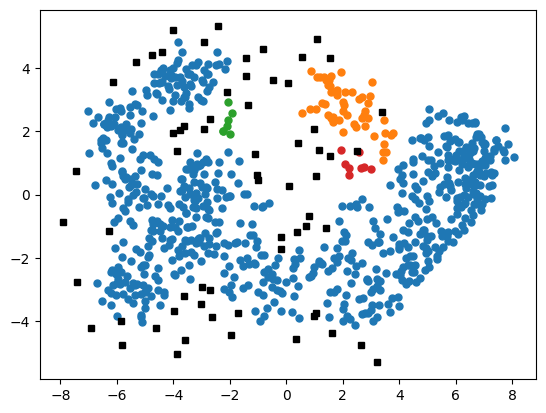

In [76]:
# Defining the parameters for DBSCAN
# Trying a different epsilon, picked by elbow method
eps = 0.5
min_samples = 4

# Appling DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
label = dbscan.fit_predict(preprocessed_data)

# Plotting the clusters
for i in range(k):
    plt.plot(preprocessed_data[label == i , 0] , preprocessed_data[label == i , 1], '.', markersize=10, label = i)
plt.plot(preprocessed_data[label == -1 , 0] , preprocessed_data[label == -1 , 1], 'sk', markersize=4, label = -1) #plotting outliers as black squares
plt.show()

dbscan_labels = label

# This clustering algorithm does not seem to be suitable for this particular data set

An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.

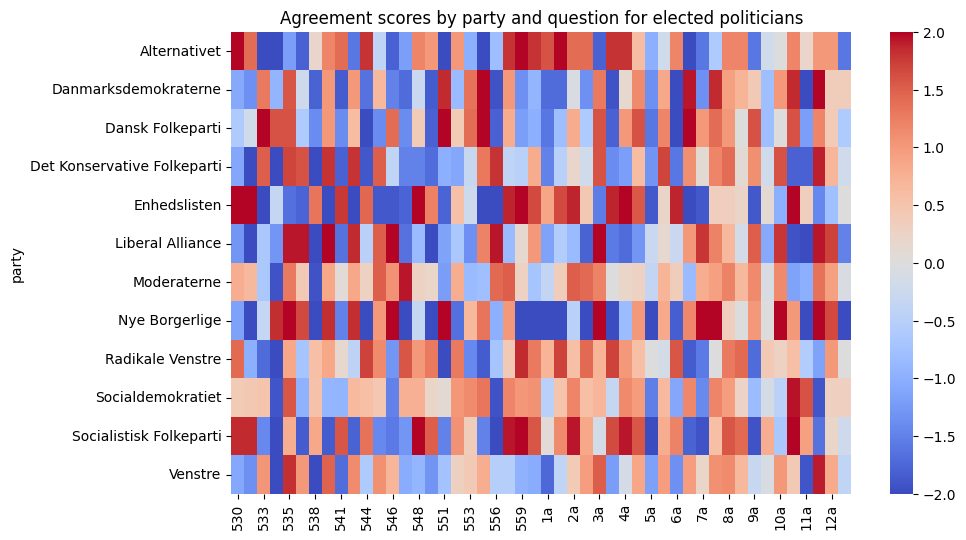

In [77]:
# Loading the data and rename columns
elected_data = pd.read_excel('electeddata.xlsx')
elected_data.rename(columns={'parti': 'party', 'alder': 'age', 'navn': 'name', 'storkreds': 'area'}, inplace=True)

# Defining the columns that contain the question responses
question_columns = ["party", "530", "531", "533", "534", "535", "537", "538", "540", "541", "543", "544", "545", "546", "547", "548", "550", "551", "552", "553", "555", "556", "557", "559", "561", "1a", "1b", "2a", "2b", "3a", "3b", "4a", "4b", "5a", "5b", "6a", "6b", "7a", "7b", "8a", "8b", "9a", "9b", "10a", "10b", "11a", "11b", "12a", "12b"]

# Selecting only the question columns
elected_data_questions = elected_data[question_columns]

# Calculating the agreement score for each party and question
party_scores = elected_data_questions.groupby('party').mean()

# Identifying the parties with the highest and lowest agreement scores
highest_agreement_party = party_scores.idxmax()
lowest_agreement_party = party_scores.idxmin()

# Visualizing the results
plt.figure(figsize=(10, 6))
sns.heatmap(party_scores, cmap='coolwarm', center=0)
plt.title('Agreement scores by party and question for elected politicians')
plt.show()

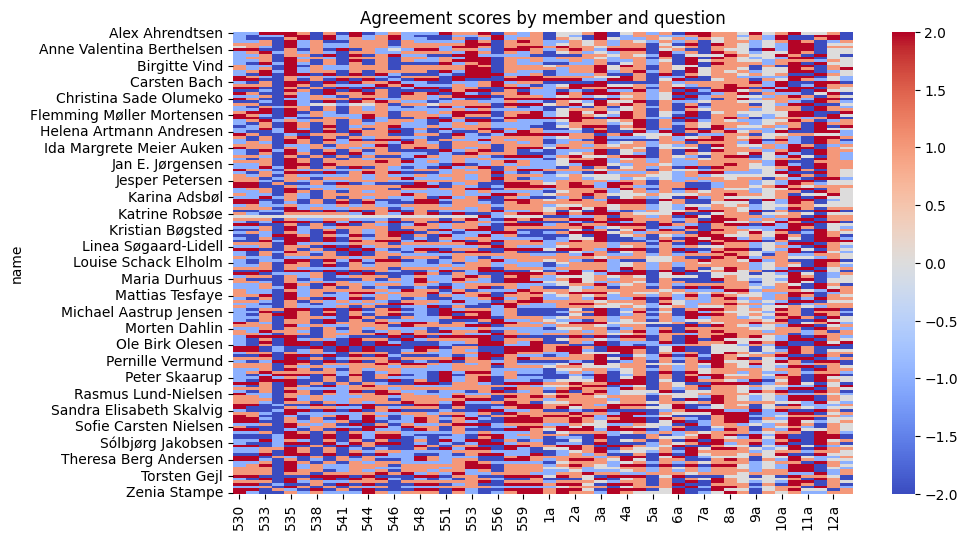

In [78]:
question_columns = ["name", "530", "531", "533", "534", "535", "537", "538", "540", "541", "543", "544", "545", "546", "547", "548", "550", "551", "552", "553", "555", "556", "557", "559", "561", "1a", "1b", "2a", "2b", "3a", "3b", "4a", "4b", "5a", "5b", "6a", "6b", "7a", "7b", "8a", "8b", "9a", "9b", "10a", "10b", "11a", "11b", "12a", "12b"]
elected_data_questions = elected_data[question_columns]


# Calculating the agreement score for each member and question
member_scores = elected_data_questions.groupby('name').mean()

# Identifying the members with the highest and lowest agreement scores
highest_agreement_member = member_scores.idxmax()
lowest_agreement_member = member_scores.idxmin()

# Visualizing the results
plt.figure(figsize=(10, 6))
sns.heatmap(member_scores, cmap='coolwarm', center=0)
plt.title('Agreement scores by member and question')
plt.show()

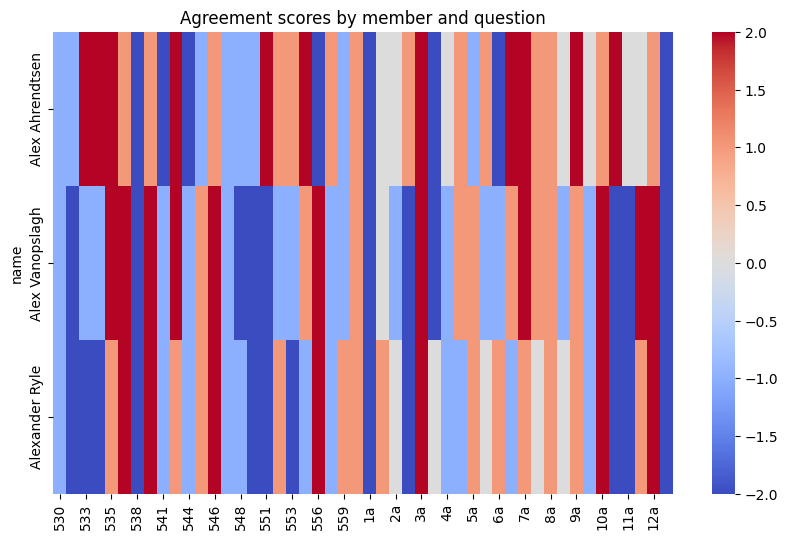

In [79]:
# Visualizing the results
plt.figure(figsize=(10, 6))
sns.heatmap(member_scores[:3], cmap='coolwarm', center=0)
plt.title('Agreement scores by member and question')
plt.show()

The politicians who disagree the most are: Peder Hvelplund and Sandra Elisabeth Skalvig


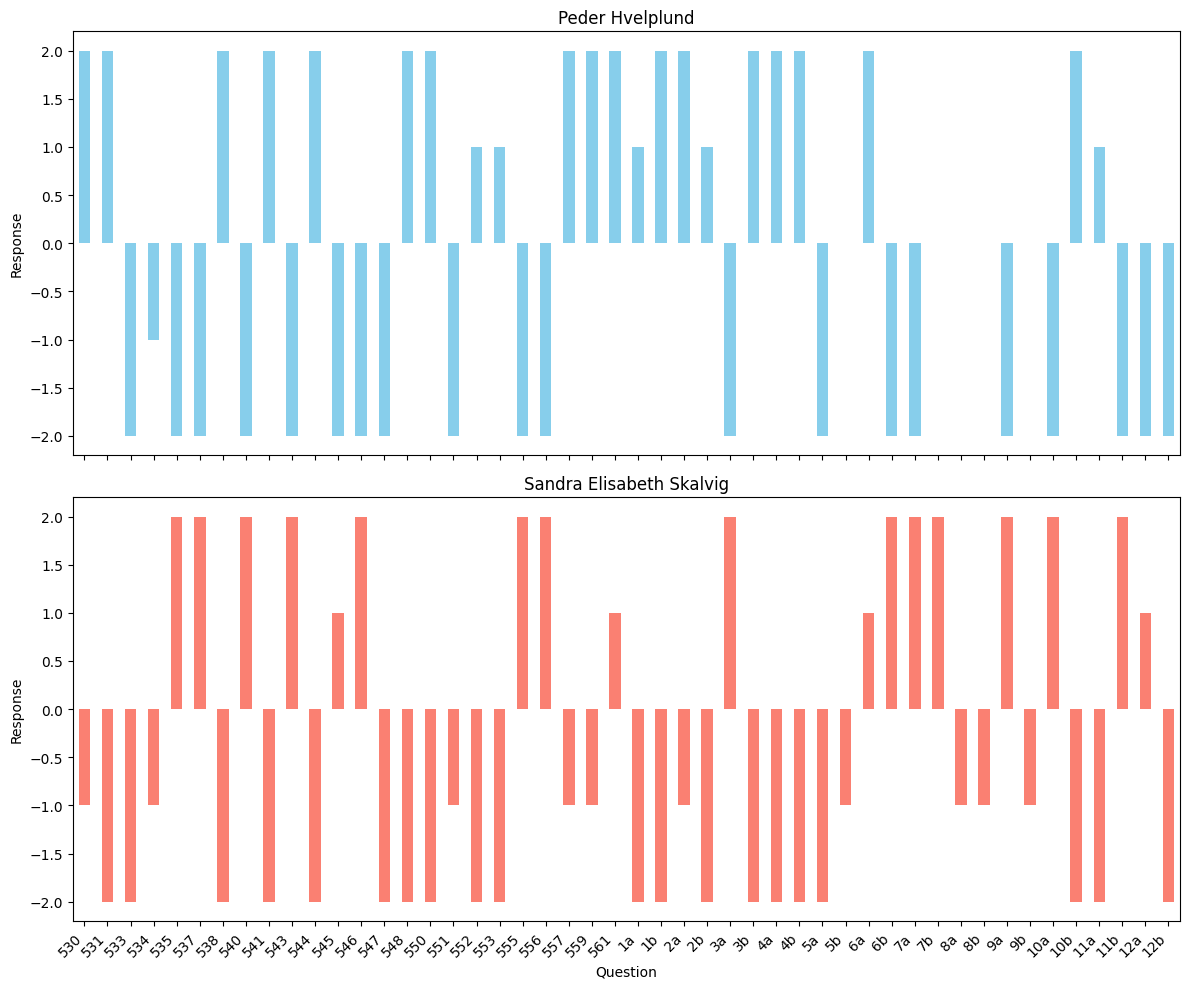

In [80]:
# Dropping the 'name' column as we only need the answers to questions for computation
elected_data_answers = elected_data_questions.drop(columns=["name"])

# Computing dissimilarity matrix
dissimilarity_matrix = np.zeros((len(elected_data_answers), len(elected_data_answers)))

# Iterating over pairs of politicians
for i in range(len(elected_data_answers)):
    for j in range(i+1, len(elected_data_answers)):
        # Computing Euclidean distance between answers of politician i and politician j
        dissimilarity = np.linalg.norm(elected_data_answers.iloc[i] - elected_data_answers.iloc[j])
        # Storing dissimilarity in the matrix (symmetric matrix)
        dissimilarity_matrix[i, j] = dissimilarity
        dissimilarity_matrix[j, i] = dissimilarity

# Finding the pair with the highest dissimilarity
max_dissimilarity_index = np.unravel_index(np.argmax(dissimilarity_matrix), dissimilarity_matrix.shape)
politician1_index, politician2_index = max_dissimilarity_index

# Getting the names of the politicians
politician1 = elected_data_questions.iloc[politician1_index]['name']
politician2 = elected_data_questions.iloc[politician2_index]['name']

# Extracting dissimilarity score between the two politicians
max_dissimilarity_score = dissimilarity_matrix[politician1_index, politician2_index]

# Extracting responses of the two politicians
politician1_responses = elected_data_questions.iloc[politician1_index, 1:].astype(float)
politician2_responses = elected_data_questions.iloc[politician2_index, 1:].astype(float)

print(f"The politicians who disagree the most are: {politician1} and {politician2}")

# Plotting bar plots for each politician separately
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plotting for Politician 1
politician1_responses.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title(politician1)
axs[0].set_ylabel('Response')
axs[0].legend().set_visible(False)

# Plotting for Politician 2
politician2_responses.plot(kind='bar', ax=axs[1], color='salmon')
axs[1].set_title(politician2)
axs[1].set_ylabel('Response')
axs[1].set_xlabel('Question')

# Setting x-axis ticks and labels
plt.xticks(range(len(politician1_responses)), politician1_responses.index, rotation=45, ha='right')

# Adjusting layout
plt.tight_layout()
plt.show()

# This barplot shows the 2 politicians amongst all parties, that disagree the most

In [81]:
# Evaluation of the clustering algorithms using Silhouette Score

# Computing Silhouette Score
silhouette_dbscan = silhouette_score(preprocessed_data, dbscan_labels)
silhouette_agg = silhouette_score(preprocessed_data, agg_labels)
silhouette_kmeans = silhouette_score(preprocessed_data, kmeans_labels)
print("k-means:", round(silhouette_kmeans, 4 ))
print("Agglomerative Clustering:", round(silhouette_agg, 4))
print("DBSCAN:", round( silhouette_dbscan,4 ))

# The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
# From this we can see that for this dataset K-means and Agglomerative Clustering are similarly good, and DBSCAN is the worst.

k-means: 0.4552
Agglomerative Clustering: 0.3993
DBSCAN: -0.4127
